In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('setup complete')

setup complete


In [3]:
df = pd.read_csv('loan_data.txt')

In [4]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [14]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

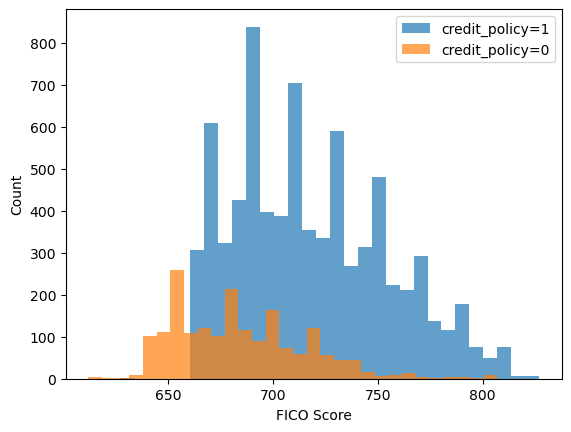

In [17]:
plt.hist(df[df['credit.policy']==1]['fico'],alpha=0.7,bins=30,label='credit_policy=1')
plt.hist(df[df['credit.policy']==0]['fico'],alpha=0.7,bins=30,label='credit_policy=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.legend()

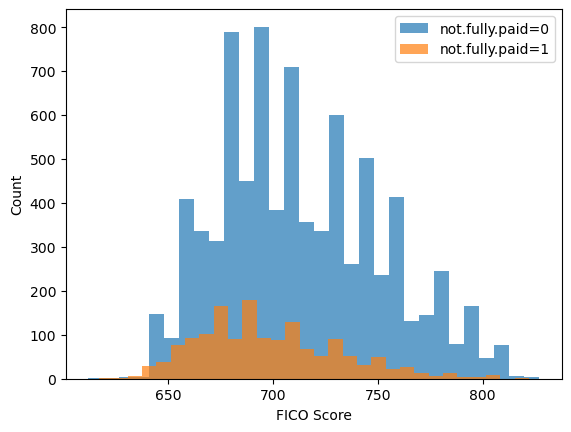

In [18]:
plt.hist(df[df['not.fully.paid']==0]['fico'],alpha=0.7,bins=30,label='not.fully.paid=0')
plt.hist(df[df['not.fully.paid']==1]['fico'],alpha=0.7,bins=30,label='not.fully.paid=1')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.legend()

<AxesSubplot: xlabel='purpose', ylabel='count'>

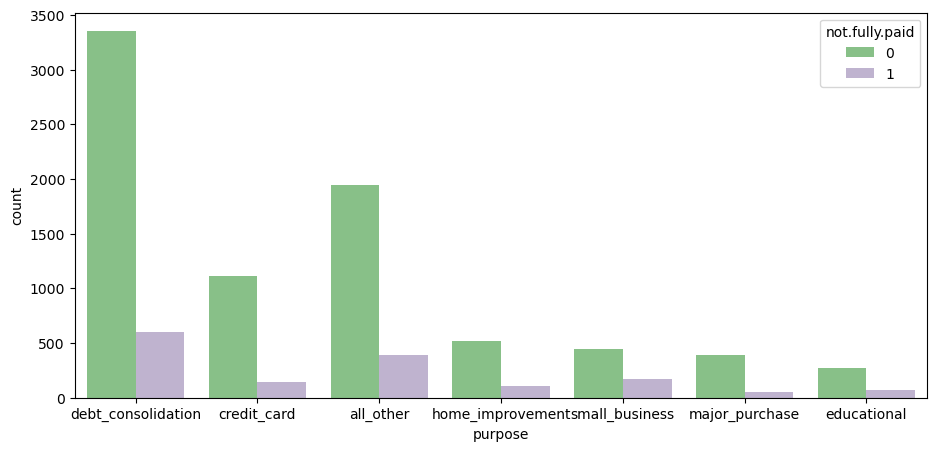

In [21]:
plt.figure(figsize=(11,5))
sns.countplot(data=df,x='purpose',hue='not.fully.paid',palette='Accent')

In [24]:
x = pd.DataFrame(df.groupby('not.fully.paid')['purpose'].value_counts())
x.rename(columns={'purpose':'count'},inplace=True)
x = x.reset_index()
result = pd.crosstab(index=x['not.fully.paid'],columns=x['purpose'],values=x['count'],aggfunc='sum',normalize='columns')
result

purpose         all_other  credit_card  debt_consolidation  educational  \
not.fully.paid                                                            
0                0.833977     0.884311            0.847612     0.798834   
1                0.166023     0.115689            0.152388     0.201166   

purpose         home_improvement  major_purchase  small_business  
not.fully.paid                                                    
0                       0.829889        0.887872        0.722132  
1                       0.170111        0.112128        0.277868

<AxesSubplot: xlabel='purpose,not.fully.paid'>

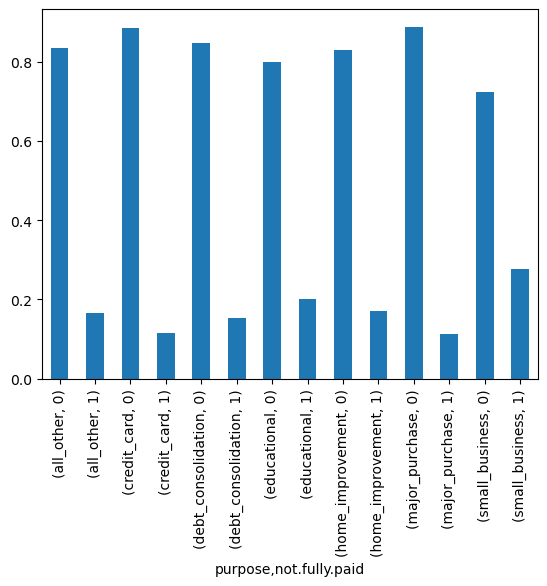

In [25]:
result.unstack().plot(kind='bar')

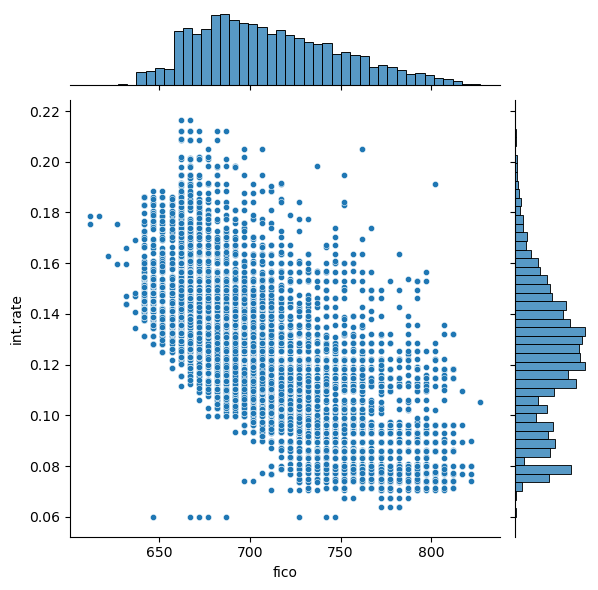

In [27]:
g = sns.jointplot(data=df,x='fico',y='int.rate',s=20)

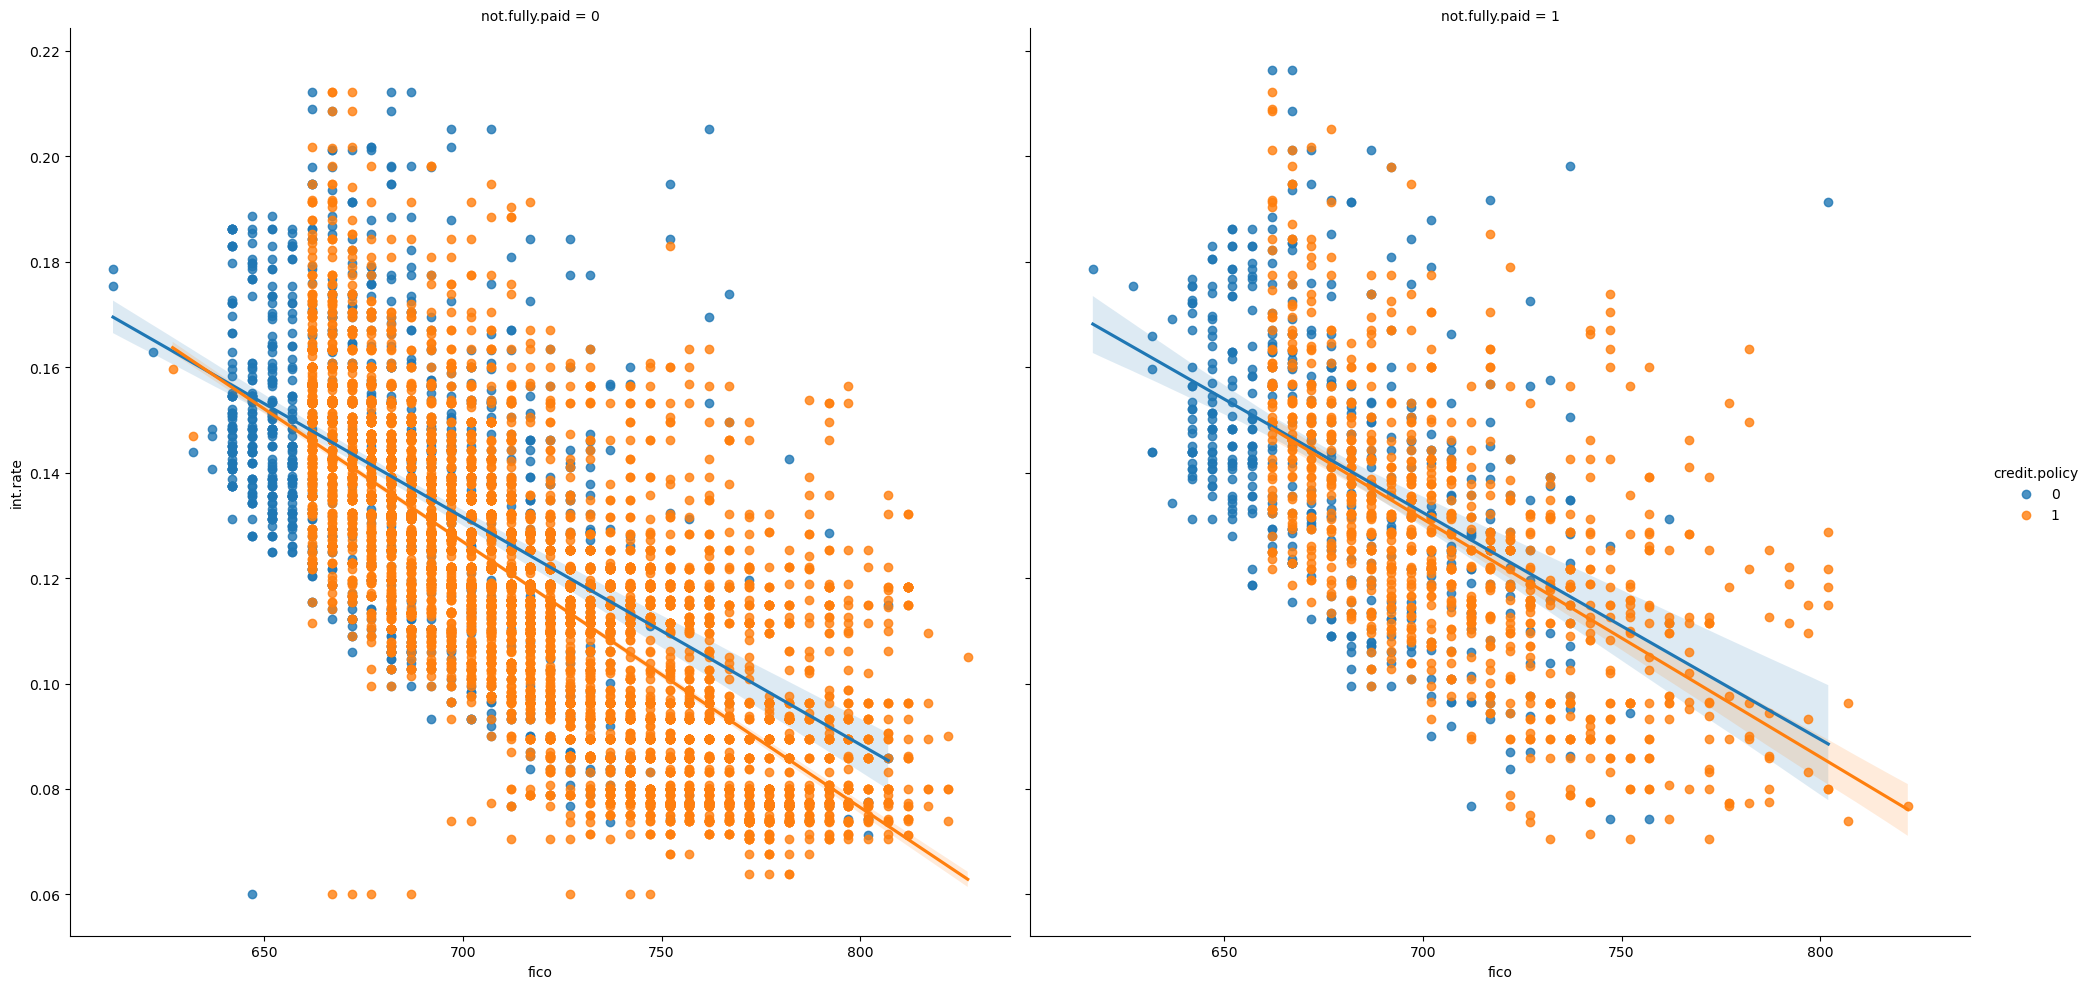

In [28]:
sns.lmplot(data=df,x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',height=10)

In [29]:
cat_feats = ['purpose']

In [30]:
df_1 = pd.get_dummies(df,columns=cat_feats,drop_first=True)
df_1.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x1 = df_1.drop('not.fully.paid',axis=1)
y1 = df_1['not.fully.paid']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=101)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dt_pre = dt.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test,dt_pre))

[[1997  434]
 [ 344   99]]


In [41]:
print(classification_report(y_test,dt_pre))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()

In [44]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc.predict(x_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[2419   12]
 [ 430   13]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874

